<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
!pip install statsmodels

In [ ]:
!pip install numpy

In [ ]:
!pip install scipy

In [ ]:
!pip install pandas

In [ ]:
!pip install sklearn

In [ ]:
!pip install yfinance

In [8]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose

#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)
#import cufflinks as cf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [69]:
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df.tail(2018)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412
2012-01-09,60.788570,61.107143,60.192856,60.247143,57.441391,98505792
...,...,...,...,...,...,...
2020-01-03,297.149994,300.579987,296.500000,297.429993,293.598297,36633878
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2018 entries, 2012-01-03 to 2020-01-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2018 non-null   float64
 1   High       2018 non-null   float64
 2   Low        2018 non-null   float64
 3   Close      2018 non-null   float64
 4   Adj Close  2018 non-null   float64
 5   Volume     2018 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.4 KB


In [73]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.500000,58.928570,58.428570,58.747143,56.011238,75564699.0
2012-01-04,58.599998,59.240002,58.468571,59.062859,56.312252,65061108.0
2012-01-05,59.278572,59.792858,58.952858,59.718571,56.937424,67816805.0
2012-01-06,59.967140,60.392857,59.888573,60.342857,57.532646,79596412.0
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813.0


In [79]:
start_date = datetime(2017,5,5)
end_date = datetime(2020,1,9)
lim_df = df[start_date:end_date]
lim_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-05,146.759995,148.979996,146.759995,148.960007,145.527573,27327725.0
2017-05-06,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-07,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-08,149.029999,153.699997,149.029999,153.009995,149.484283,48752413.0
2017-05-09,153.869995,154.880005,153.449997,153.990005,150.441696,39130363.0
...,...,...,...,...,...,...
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,293.790009,299.959991,292.750000,299.799988,295.937744,29644644.0
2020-01-07,299.839996,300.899994,297.480011,298.390015,294.545959,26207813.0


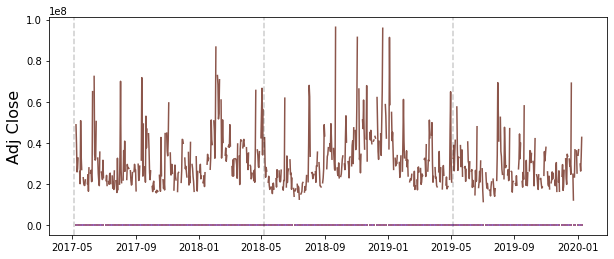

In [81]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
#plt.title('Adj Close in 2018 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)

In [82]:
first_diff = lim_df.diff()[1:]

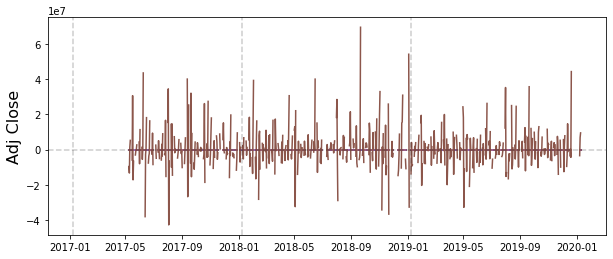

In [83]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 763 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-09'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [91]:
# Get training and testing sets
train_end = datetime(2017,5,5)
test_end = datetime(2020,1,9)

train_data = lim_df[:train_end]['Adj Close']
test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']


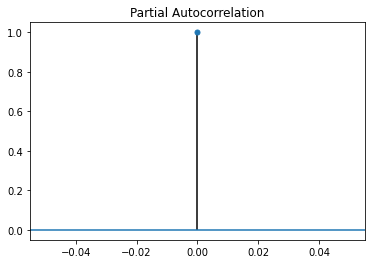

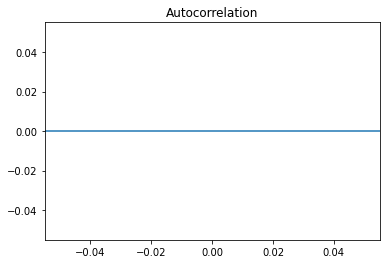

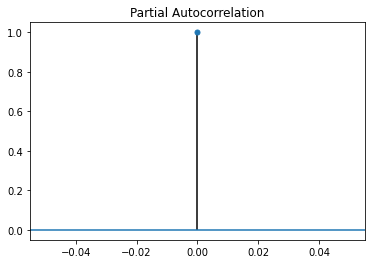

In [136]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
plot_acf(test_data, lags=20, alpha=0.01)
plot_pacf(test_data, lags=20, alpha=0.01)

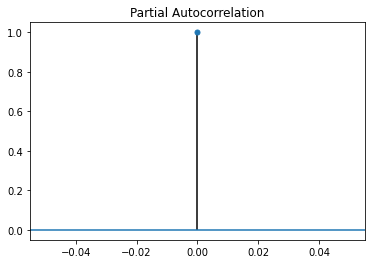

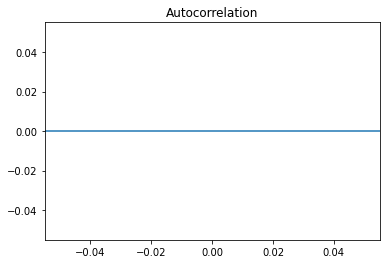

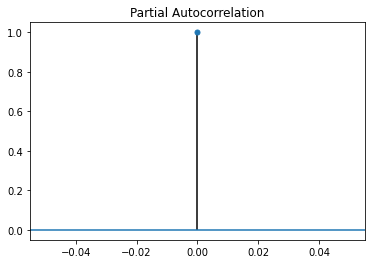

In [137]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
plot_acf(test_data, lags=20, alpha=0.05)
plot_pacf(test_data, lags=20, alpha=0.05)

In [138]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]
[ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


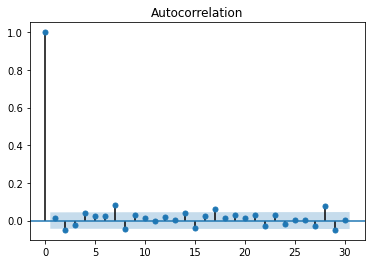

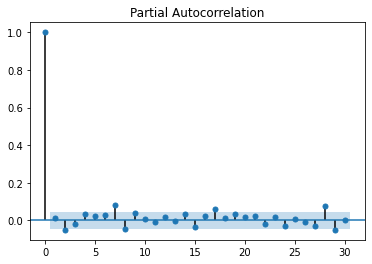

In [ ]:
from statsmodels.tsa.stattools import pacf

#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df

#plot ACF
#plot_acf(test_data, lags=30)
plot_acf(data_df['Adj Close'], lags= 30)

#plot the PACF
#plot_pacf(data_df['Adj Close'], lags=30)
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

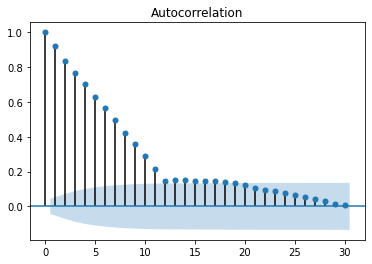

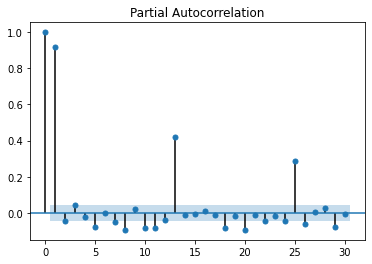

In [ ]:
from statsmodels.tsa.stattools import pacf

#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
plot_acf(data_df['Adj Close'], lags= 30)

#plot PACF
plot_pacf(data_df['Adj Close'], lags=30)
plt.show()

In [112]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                          Adj Close   No. Observations:                  979
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1690.498
Date:                            Fri, 21 Jan 2022   AIC                           3390.995
Time:                                    16:13:10   BIC                           3415.288
Sample:                                05-06-2017   HQIC                          3400.250
                                     - 01-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3245      0.329      0.987      0.323      -0.320       0.968
ma.L1         -0.4229      0.309   

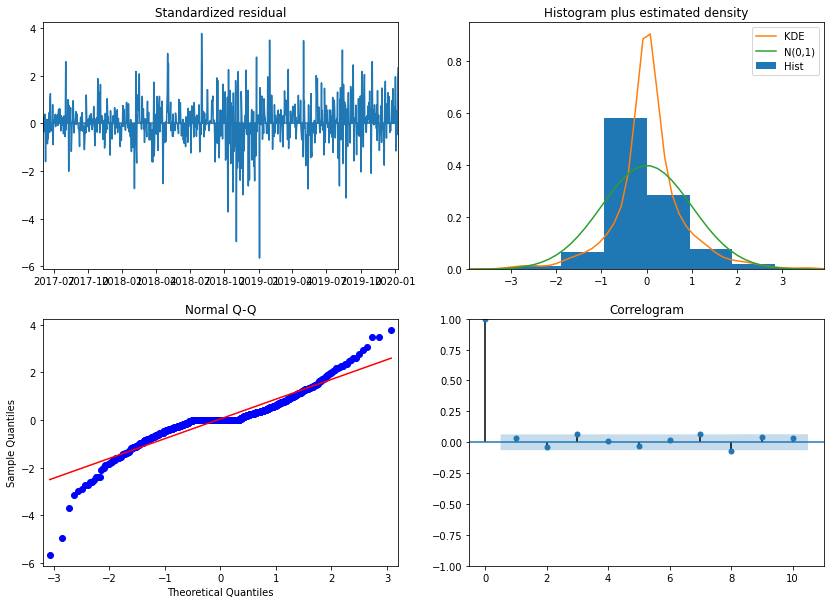

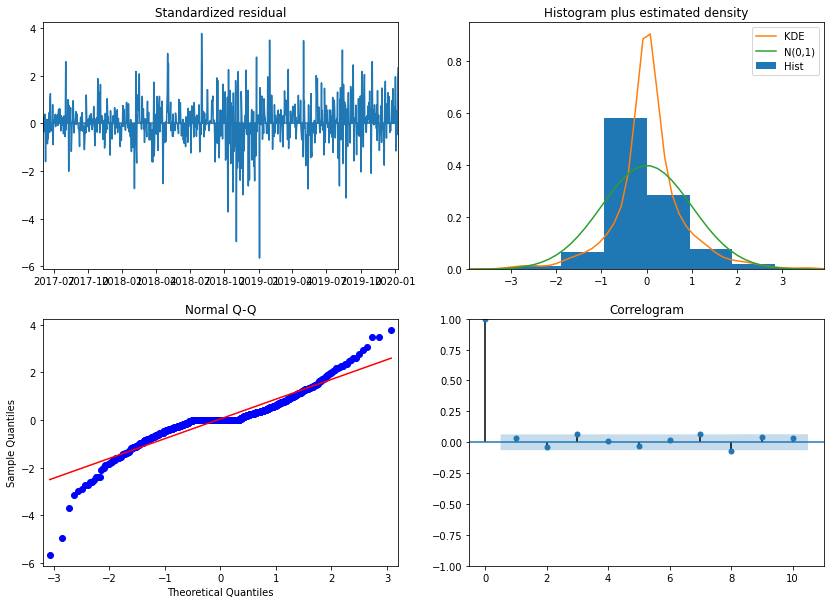

In [113]:
results.plot_diagnostics(figsize=(14,10))

In [129]:
# Get the predictions and residuals
predictions = results.forecast(len(test_data))
print(predictions)
pred = pd.Series(predictions, index=test_data.index)
residuals = test_data - pred
residuals

2020-01-10    305.157718
2020-01-11    305.419701
2020-01-12    305.636269
2020-01-13    305.917647
2020-01-14    305.263538
                 ...    
2022-09-10    459.125280
2022-09-11    459.433235
2022-09-12    458.788093
2022-09-13    459.604594
2022-09-14    459.637711
Freq: D, Length: 979, dtype: float64


Date
2017-05-06   NaN
2017-05-07   NaN
2017-05-08   NaN
2017-05-09   NaN
2017-05-10   NaN
              ..
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
2020-01-09   NaN
Freq: D, Length: 979, dtype: float64

Text(0, 0.5, 'Error')

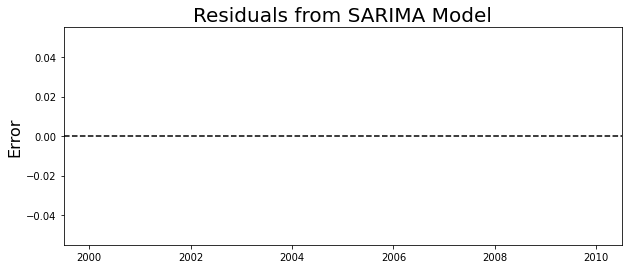

In [130]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

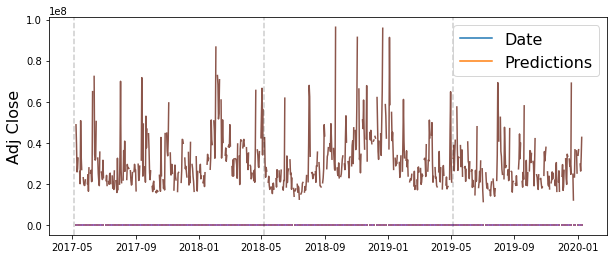

In [126]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.plot(predictions)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-05-05'), color='k', linestyle='--', alpha=0.2)

plt.show()

In [127]:
# Đánh giá mô hình
print('MAPE', round(np.mean(abs(residuals/test_data)),4))

MAPE nan


In [122]:
print('RMSE', np.sqrt(np.mean(residuals**2)))

RMSE 189.4269659483485


In [97]:
# Forcast 50 steps ahead
forecast_values = results.get_forecast(steps= 50)

# Confidence Intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

In [ ]:
# Forcast 12 steps ahead
forecast_values = results.get_forecast(steps= 12)

#Prediction summary
forecast_values.summary_frame()

In [ ]:
#Prediction
model_predict = forecast_values.predicted_mean

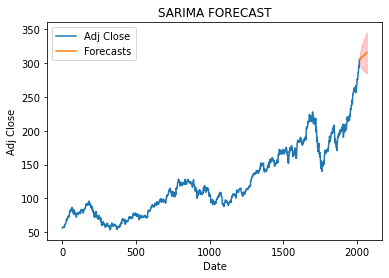

In [ ]:
#Confidence interval
pred_ci = forecast_values.conf_int()
#plot the data
ax = df['Adj Close'].plot()
#ax = results.get_prediction(start=pd.to_datetime('2017-05-05'), dynamic=False)
#ax = results.predict(start= pd.to_datetime('2017-05-05'),end= pd.to_datetime('2020-01-09'), dynamic= True)
#ax = results.get_prediction(start= train_end,end=test_end)

#plot the forecasted values
forecast_values.predicted_mean.plot(ax=ax, label= 'Forecasts')

#Plot the Confidence Intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:,0],
                forecast_ci.iloc[:,1],
                color='r', alpha=.2)

#Axes labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')
ax.set_title('SARIMA FORECAST')
plt.legend()
plt.show()

In [ ]:
# Đánh giá mô hình
y_forecasted = forecast_values.predicted_mean
#y_truth = y['2018-06-01':]
#y_truth = train_data
y_truth = lim_df[train_end:test_end]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

In [ ]:
mape = np.mean(np.abs(np.array(model_predict[:-979]) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))